In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy

In [3]:
PARENT_PATH = os.path.dirname(os.getcwd())
PREPROCESSED_DATA_PATH = os.path.join(PARENT_PATH, 'Data-Collected','Preprocessed-Data','CSV-Files','sample-02.csv')
OUTPUT_PATH = os.path.join(PARENT_PATH, 'Data-Visualization','Outputs')


In [4]:
df = pd.read_csv(PREPROCESSED_DATA_PATH)
df = df[["Temp In","Temp Out","Hum In","Hum Out"]]
df.head()

,Temp In,Temp Out,Hum In,Hum Out
0,31.87,30.91,79.99,75.92
1,31.94,30.32,78.35,79.33
2,32.02,30.04,78.34,80.69
3,31.60,29.77,78.62,80.15
4,31.99,29.69,80.20,81.93


In [5]:
df.describe()

,Temp In,Temp Out,Hum In,Hum Out
count,181.000000,181.000000,181.000000,181.000000
mean,31.399945,27.256354,85.687901,96.964751
std,0.618184,0.969413,2.957603,5.107641
min,29.230000,26.140000,78.340000,75.920000
25%,31.000000,26.560000,84.300000,96.590000
50%,31.300000,26.900000,86.750000,99.740000
75%,31.870000,27.900000,87.730000,100.000000
max,32.550000,30.910000,89.830000,100.000000


In [9]:
temperature_df = df[["Temp In","Temp Out"]]
humidity_df = df[["Hum In","Hum Out"]]

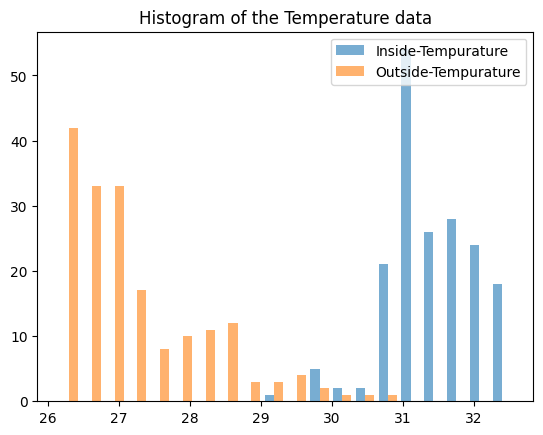

In [ ]:

plt.figure(figsize=(8, 6))
plt.title('Histogram of the Temperature data')
plt.hist(temperature_df.values, bins=20, alpha=0.6, label=['Inside-Tempurature', 'Outside-Tempurature'])
plt.legend(loc='upper right')
plt.savefig(os.path.join(OUTPUT_PATH, 'Temperature-Histogram.png'), dpi=300)
plt.show()

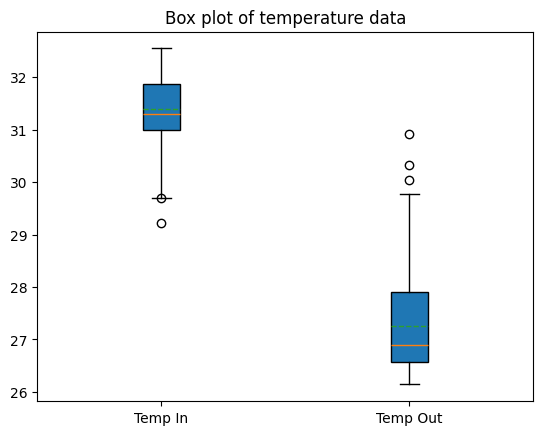

In [11]:
plt.title('Box plot of temperature data')
plt.boxplot(temperature_df.values, tick_labels=temperature_df.columns, showmeans=True, meanline=True, patch_artist=True)
plt.savefig(OUTPUT_PATH + "/Temp-Box-Plot.png",dpi=300)
plt.show()


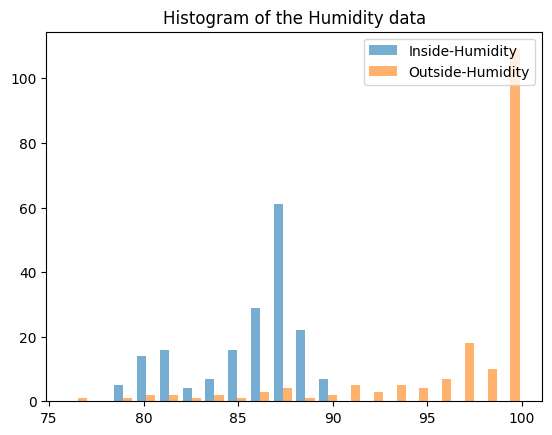

In [13]:
plt.title('Histogram of the Humidity data')
plt.hist(humidity_df.values, bins=20, alpha=0.6, label=['Inside-Humidity', 'Outside-Humidity'])
plt.legend(loc='upper right')
plt.savefig(os.path.join(OUTPUT_PATH, 'Humidity-Histogram.png'), dpi=300)
plt.show()

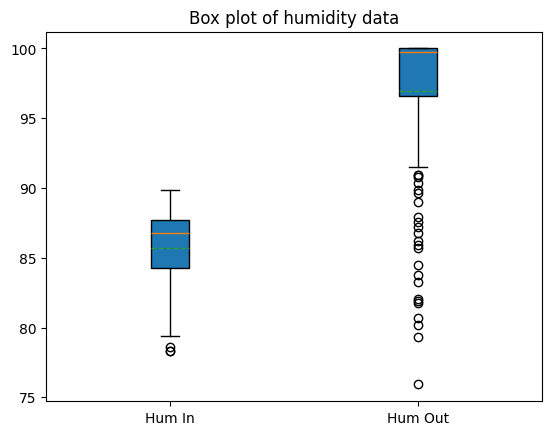

In [14]:
plt.title('Box plot of humidity data')
plt.boxplot(humidity_df.values, tick_labels=humidity_df.columns, showmeans=True, meanline=True, patch_artist=True)
plt.savefig(OUTPUT_PATH + "/Humidity-Box-Plot.png",dpi=300)
plt.show()

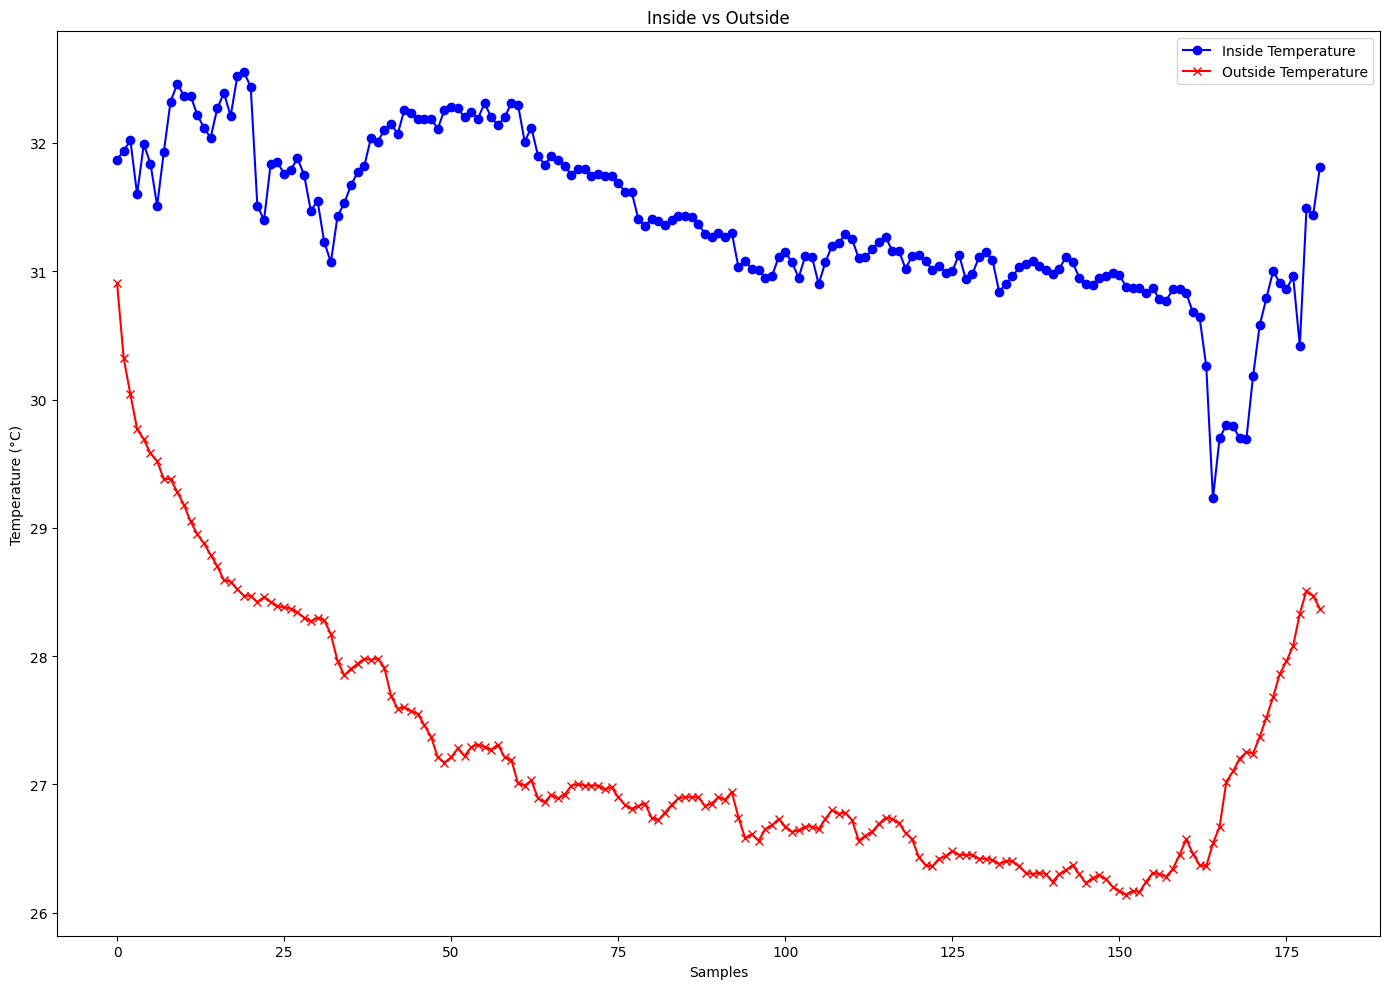

In [16]:
# Set up the figure for plotting
plt.figure(figsize=(14, 10))

plt.plot(df.index, df["Temp In"], label='Inside Temperature', color='blue', marker='o')
plt.plot(df.index, df["Temp Out"], label='Outside Temperature', color='red', marker='x')
plt.title('Inside vs Outside')
plt.xlabel('Samples')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_PATH + "/Inside-Outside-Temperature.png",dpi=300)
plt.show()

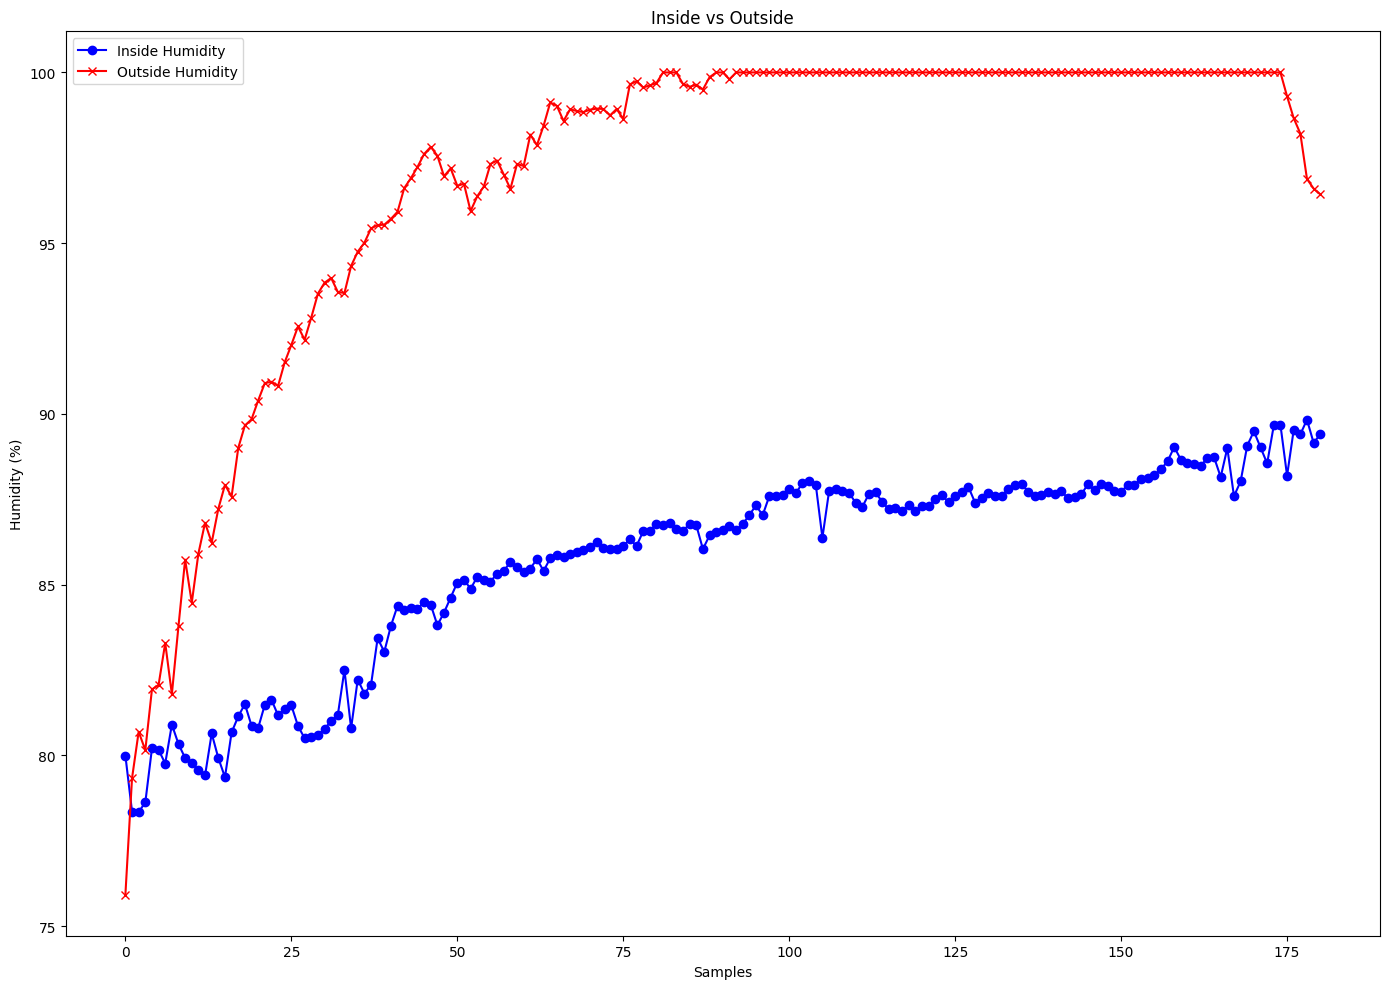

In [17]:
plt.figure(figsize=(14, 10))
plt.plot(df.index, df['Hum In'], label='Inside Humidity', color='blue', marker='o')
plt.plot(df.index, df['Hum Out'], label='Outside Humidity', color='red', marker='x')
plt.title('Inside vs Outside')
plt.xlabel('Samples')
plt.ylabel('Humidity (%)')
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_PATH + "/Inside-Outside-Humidity.png",dpi=300)
plt.show()